# We compare measured stacked flux to random 

In [1]:
import pdb
import sys
import os
import json
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from matplotlib import gridspec

from astropy.io import fits

sys.path.append("../../..")
from simstackwrapper import SimstackWrapper
from simstacktoolbox import SimstackToolbox

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [6]:
# Simstack Measurement
pickle_path_suffix0 =  "cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_X_4_foregnd_atonce_bootstrap_1-150"
underscore_suffix = ''
pickle_path0 = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities",pickle_path_suffix0)
file_path0 = os.path.join(pickle_path0+underscore_suffix, pickle_path_suffix0+".pkl")
path_ini_file0 = os.path.join(pickle_path0+underscore_suffix, "cosmos2020_farmer.ini")
print(pickle_path0)

D:\pickles/simstack\stacked_flux_densities\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_X_4_foregnd_atonce_bootstrap_1-150


In [5]:
# Null Test
pickle_path_suffix = 'cosmos2020_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_X_4_foregnd_atonce_farmer_bootstrap_1-100_null'
underscore_suffix = ''
pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities",pickle_path_suffix)
file_path = os.path.join(pickle_path+underscore_suffix, pickle_path_suffix+".pkl")
path_ini_file = os.path.join(pickle_path+underscore_suffix, "cosmos2020_null_test.ini")
print(pickle_path)

D:\pickles/simstack\stacked_flux_densities\cosmos2020_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_X_4_foregnd_atonce_farmer_bootstrap_1-100_null


In [7]:
# Import saved stacking measurement
simstack_object = SimstackToolbox.import_saved_pickles(file_path0)

In [8]:
simstack_object_null = SimstackToolbox.import_saved_pickles(file_path)

In [9]:
# Import catalog
simstack_catalog_object = SimstackWrapper(path_ini_file0, read_maps=False, read_catalog=True, keep_catalog=True, stack_automatically=False, save_automatically=False)

In [10]:
simstack_catalog_object_null = SimstackWrapper(path_ini_file, read_maps=False, read_catalog=True, keep_catalog=True, stack_automatically=False, save_automatically=False)

In [11]:
# Pass saved results into SimstackResults
from simstackresults import SimstackResults
simstack_object = SimstackResults(simstack_object)
simstack_object_null = SimstackResults(simstack_object_null)

In [12]:
# Pass saved results into SimstackPlots
from simstackplots import SimstackPlots
simstack_object = SimstackPlots(simstack_object)
simstack_object_null = SimstackPlots(simstack_object_null)

In [13]:
# Call parse_results which translates the raw results into a results_dict for plotting/interpreting.
simstack_object.parse_results(catalog_object=simstack_catalog_object, estimate_mcmcs=False)
simstack_object_null.parse_results(catalog_object=simstack_catalog_object_null, estimate_mcmcs=False)

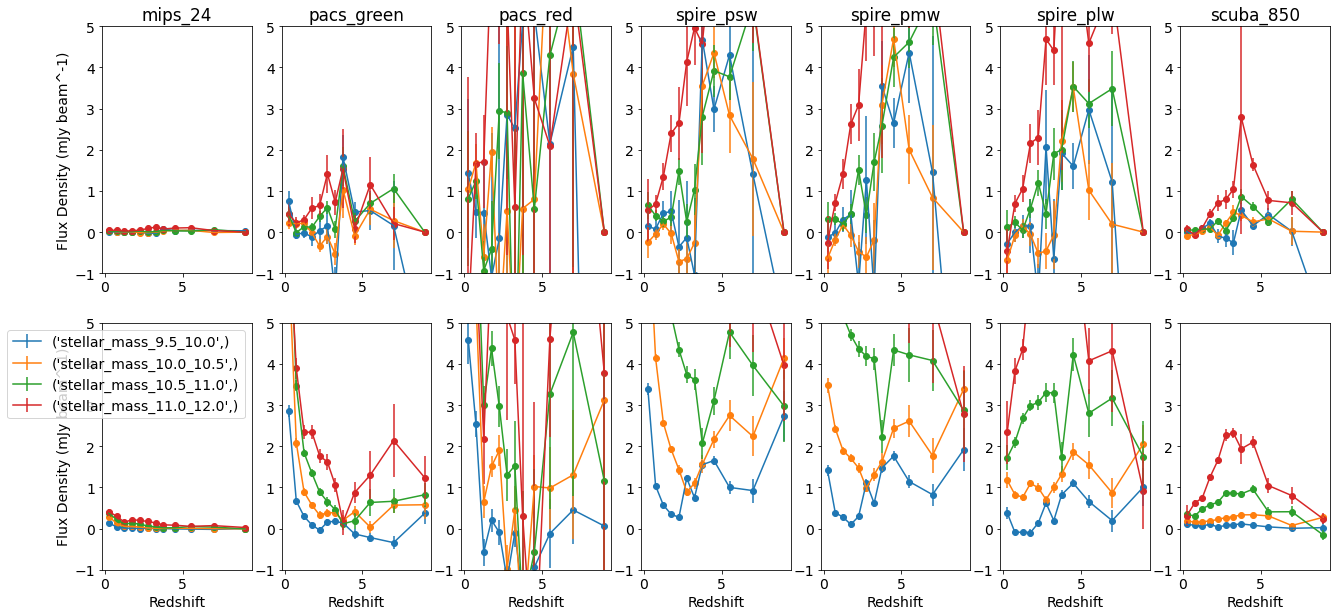

In [16]:
# Plot Measurement on linear Y axis for comparison purposes
simstack_object.plot_flux_densities(ylog=False,ylim=[-1,5])

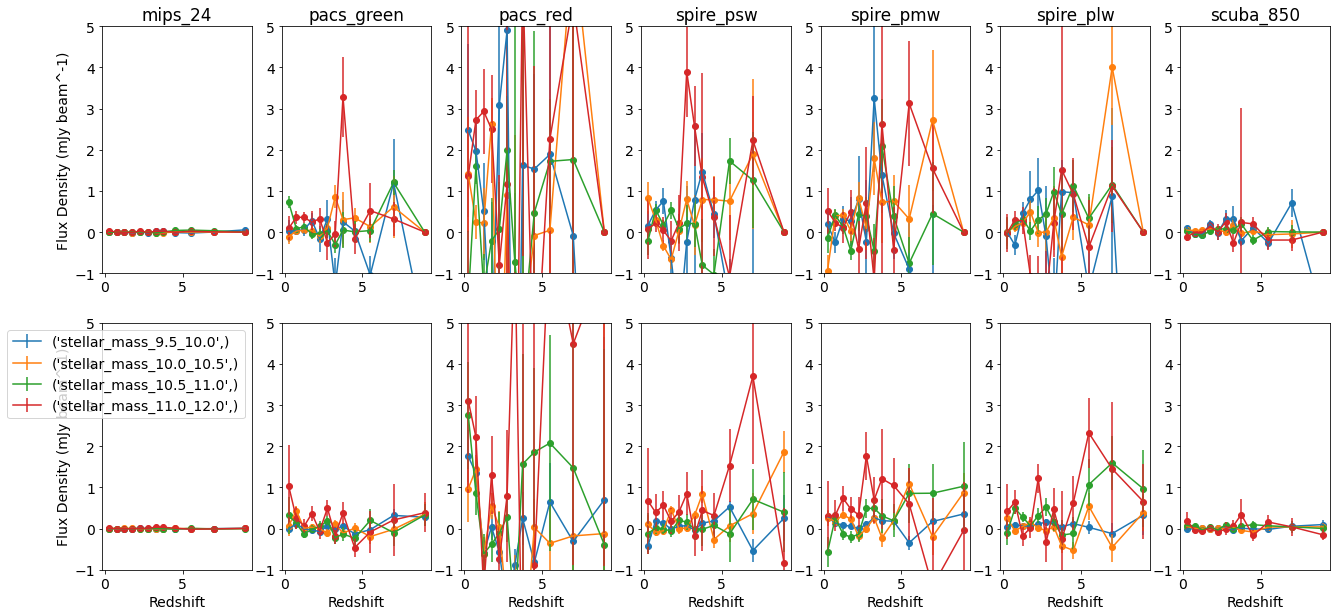

In [17]:
# Plot Null Test results on linear Y axis for comparison purposes
simstack_object_null.plot_flux_densities(ylog=False,ylim=[-1,5])